In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Mathematical Formulation:**
- Input: `x = [x₁, x₂, ..., xₙ]`
- Weights: `w = [w₁, w₂, ..., wₙ]`
- Bias: `b`
- Output: `y = f(w·x + b)`
- Weight Update Rule ->
$$
w_{\text{new}} = w_{\text{old}} + \eta \times (y_{\text{true}} - y_{\text{pred}}) \times x
$$

$$
b_{\text{new}} = b_{\text{old}} + \eta \times (y_{\text{true}} - y_{\text{pred}})
$$

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors = []
    
    def activation(self, x):
        return 1 if x >= 0 else 0
    
    def fit(self, x, y):
        n_samples, n_feature = x.shape
        self.weights = np.zeros(n_feature)
        self.bias = 0
        self.errors = []
        
        for iteration in range(self.n_iterations):
            error_count = 0
            for idx, x_i in enumerate(x):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)
                
                if y_predicted != y[idx]:
                    update = self.learning_rate * (y[idx] - y_predicted)
                    self.weights += update * x_i
                    self.bias += update
                    error_count += 1
                    
            self.errors.append(error_count)
        
            if error_count == 0:
                print(f"Converged at iteration {iteration}")
                break
    
    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

    def plot_decision_boundary(self, x, y):
        plt.figure(figsize=(10, 6))
        colors = ['red' if label == 0 else 'blue' for label in y]
        plt.scatter(x[:, 0], x[:, 1], c=colors, s=100, alpha=0.5, edgecolors='black')
        
        # Plot decision boundary
        if self.weights[1] != 0:
            x_boundary = np.linspace(x[:, 0].min() - 1, x[:, 0].max() + 1, 100)
            y_boundary = -(self.weights[0] * x_boundary + self.bias) / self.weights[1]
            plt.plot(x_boundary, y_boundary, 'g--', linewidth=2, label='Decision Boundary')

        plt.xlabel('Feature 1', fontsize=12)
        plt.ylabel('Feature 2', fontsize=12)
        plt.title('Perceptron Decision Boundary', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

In [ ]:
# AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X_and, y_and)
predictions = perceptron.predict(X_and)

Converged at iteration 3


In [4]:
for i, (x, y_true, y_pred) in enumerate(zip(X_and, y_and, predictions)):
    print(f"  Input: {x}, Target: {y_true}, Prediction: {y_pred}, {'✓' if y_true == y_pred else '✗'}")

  Input: [0 0], Target: 0, Prediction: 0, ✓
  Input: [0 1], Target: 0, Prediction: 0, ✓
  Input: [1 0], Target: 0, Prediction: 0, ✓
  Input: [1 1], Target: 1, Prediction: 1, ✓


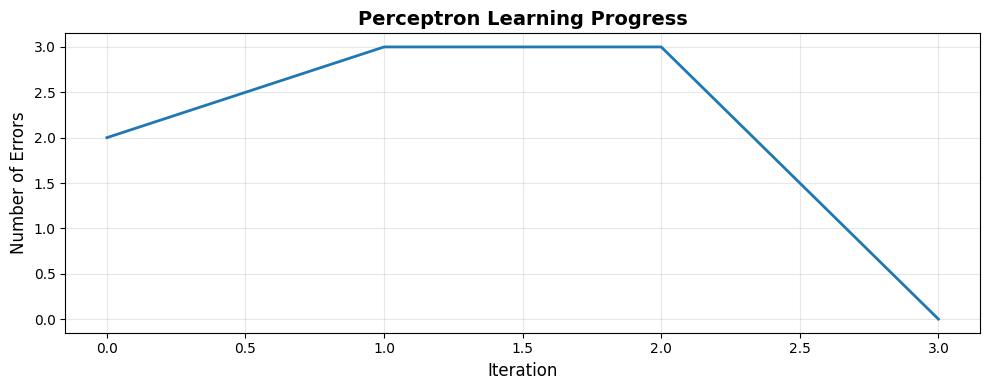

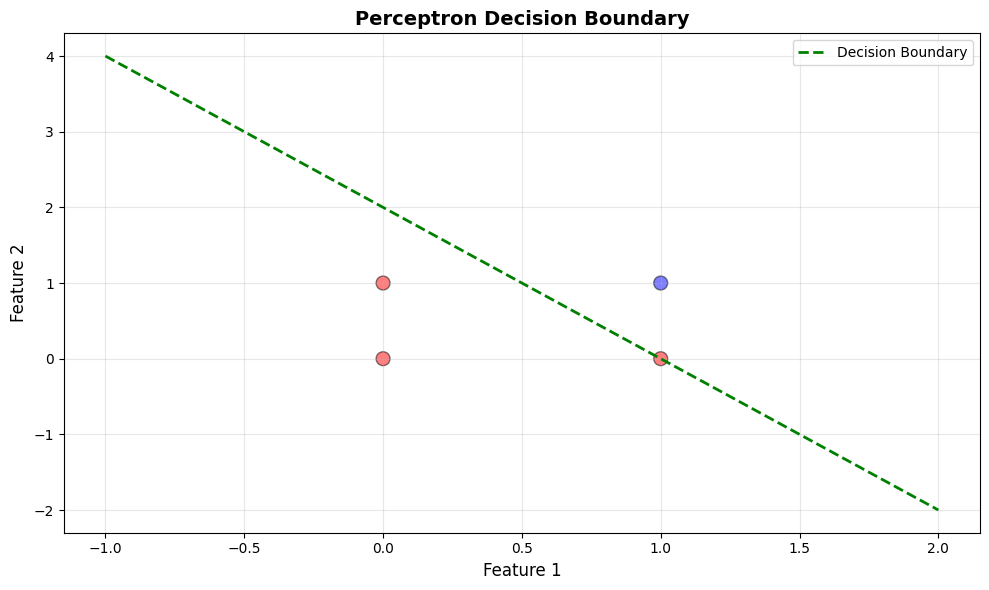

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(perceptron.errors, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Number of Errors', fontsize=12)
plt.title('Perceptron Learning Progress', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot decision boundary
perceptron.plot_decision_boundary(X_and, y_and)

**Perceptron Limitations**

- XOR Problem: Perceptron cannot solve XOR (exclusive OR) because it's not linearly separable.

`Solution: Need multiple layers (MLP)`

In [7]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

perceptron_xor = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron_xor.fit(X_xor, Y_xor)
predictions_xor = perceptron_xor.predict(X_xor)

for i, (x, y_true, y_pred) in enumerate(zip(X_xor, Y_xor, predictions_xor)):
    print(f"  Input: {x}, Target: {y_true}, Prediction: {y_pred}, {'✓' if y_true == y_pred else '✗'}")

  Input: [0 0], Target: 0, Prediction: 1, ✗
  Input: [0 1], Target: 1, Prediction: 1, ✓
  Input: [1 0], Target: 1, Prediction: 0, ✗
  Input: [1 1], Target: 0, Prediction: 0, ✓
